**Matplotlib format chart**

loading the data

In [9]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

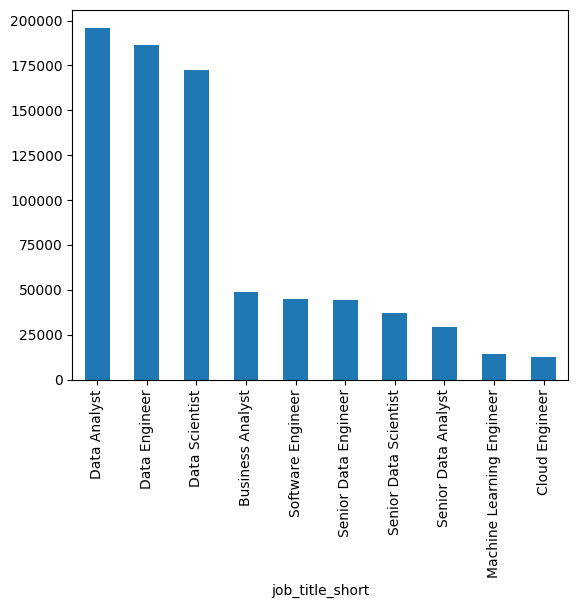

In [10]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

<Axes: ylabel='job_schedule_type'>

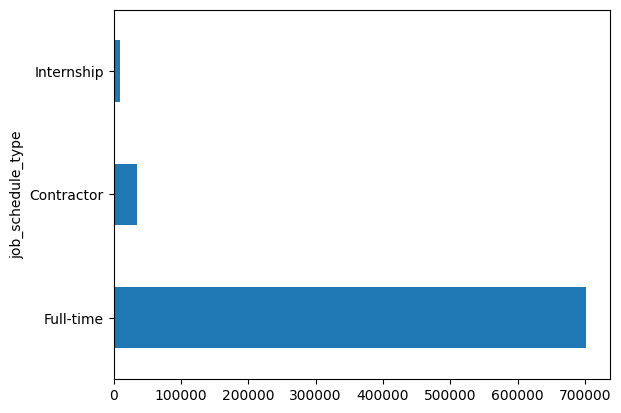

In [11]:
df['job_schedule_type'].value_counts().head(3).plot(kind='barh')



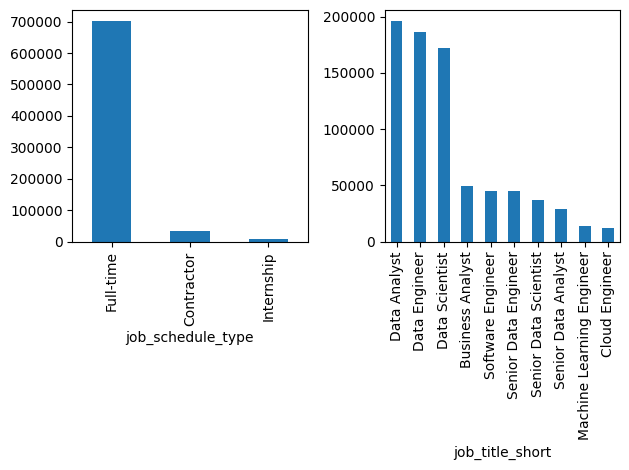

In [12]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

#To separate 2 figures

fig.tight_layout()

#Examples
Create a subplot that displays individual bar charts for each job_title_short from the DataFrame we created in 11_Pandas_Explode.

Note: This DataFrame.

Here's the code from our last exercise:

In [13]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [14]:
job_titles = ['Data Analyst','Data Scientist','Data Engineer']

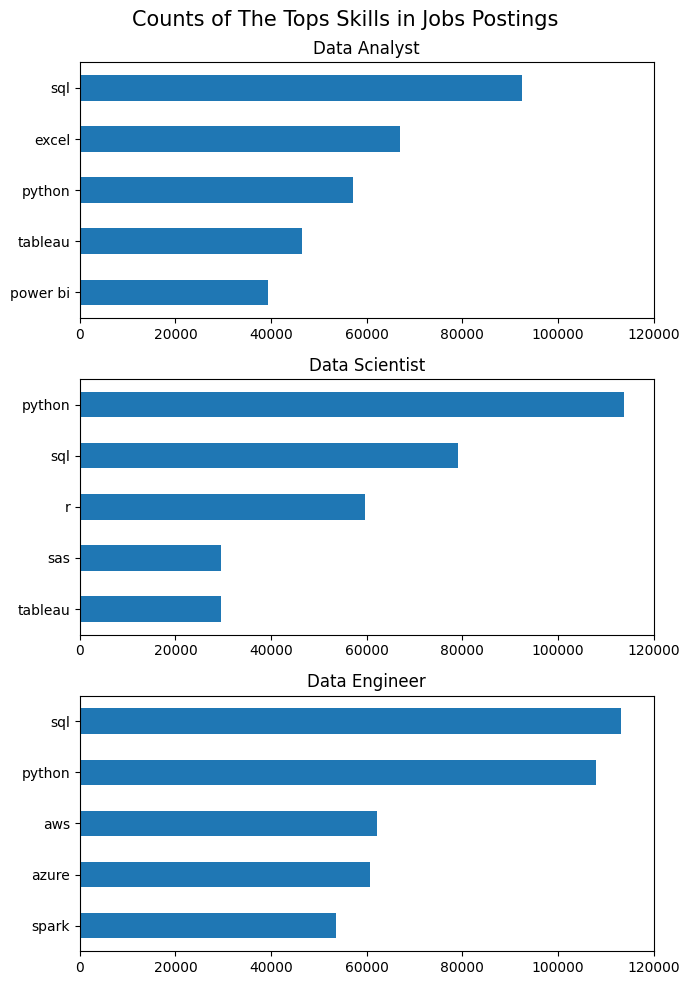

In [57]:
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

for i, job_title in enumerate(job_titles):
    df_plot =df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)
fig.suptitle('Counts of The Tops Skills in Jobs Postings', fontsize=15)
fig.tight_layout()



# ANOTHER METHOD FROM DEEPSEEK

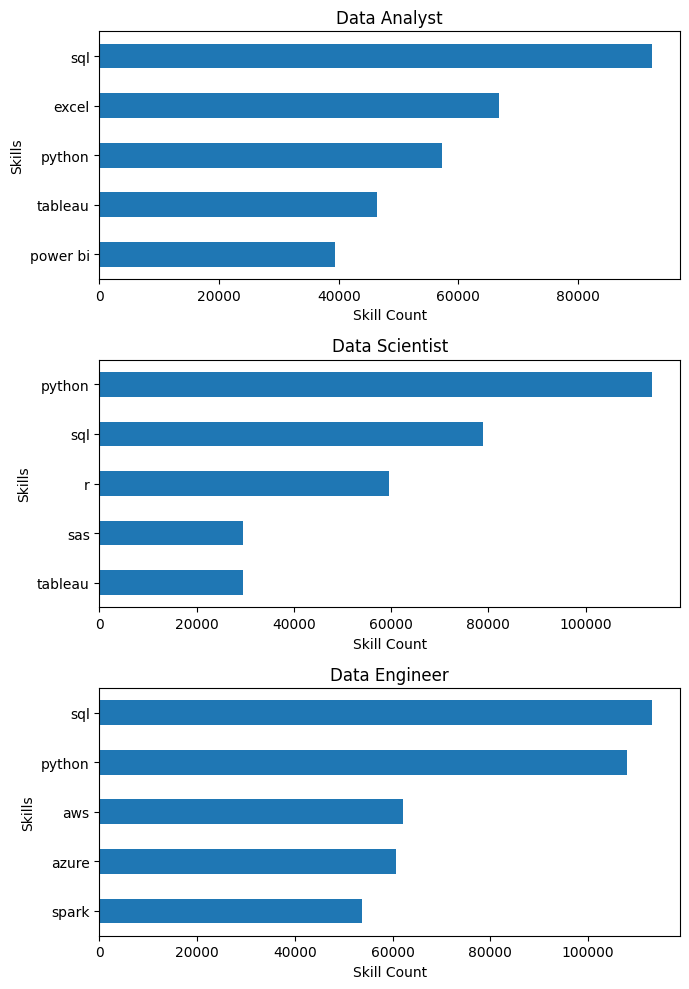

In [17]:
import matplotlib.pyplot as plt

# Assuming df_skills_count is your DataFrame and job_titles is a list of job titles
fig, ax = plt.subplots(3, 1, figsize=(7, 10))  # Adjust the figure size as needed

for i, job_title in enumerate(job_titles):
    # Filter the DataFrame for the current job title and get the top 5 skills
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    
    # Plot the horizontal bar plot
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False)
    ax[i].set_title(job_title)  # Set the title for each subplot
    ax[i].set_xlabel('Skill Count')  # Set the x-axis label
    ax[i].set_ylabel('Skills')  # Set the y-axis label
    ax[i].invert_yaxis()

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()